In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [8]:
studio_distribution = studios.group('Studio')

In [9]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [10]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

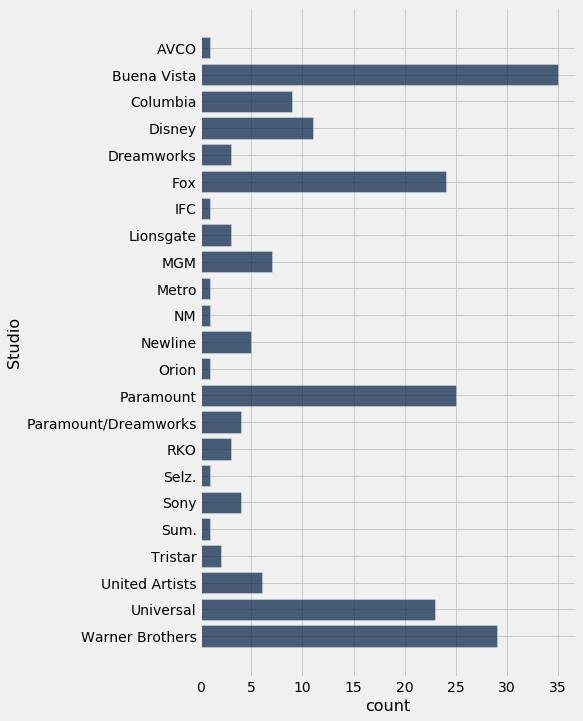

In [11]:
studio_distribution.barh('Studio')

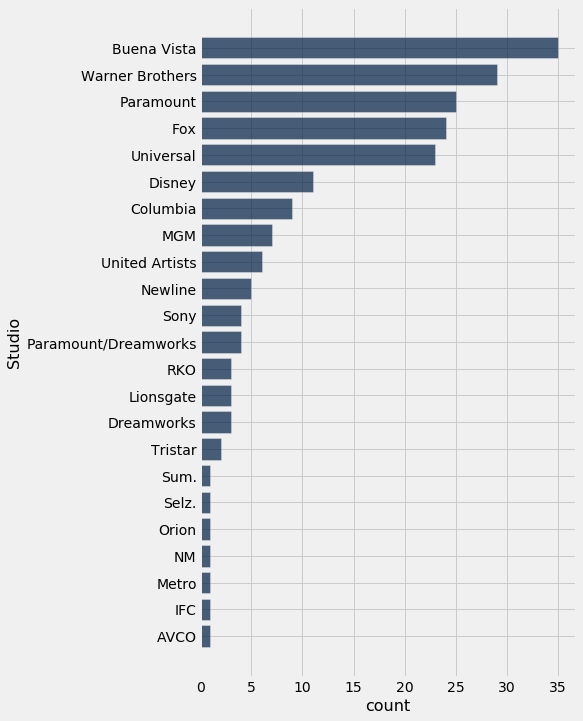

In [12]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [13]:
ages = 2020 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [14]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,81
Star Wars,Fox,460998007,1583483200,1977,43
The Sound of Music,Fox,158671368,1266072700,1965,55
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,38
Titanic,Paramount,658672302,1204368000,1997,23
The Ten Commandments,Paramount,65500000,1164590000,1956,64
Jaws,Universal,260000000,1138620700,1975,45
Doctor Zhivago,MGM,111721910,1103564200,1965,55
The Exorcist,Warner Brothers,232906145,983226600,1973,47
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,83


## Binning ##

In [15]:
min(ages), max(ages)

(3, 99)

In [16]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [17]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,12
5,18
10,17
15,41
25,42
40,52
65,18
100,0


In [16]:
sum(binned_data.column('Age count'))

200

In [18]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,88
25,66
50,38
75,8
100,0


In [19]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,88
25,70
50,0


In [21]:
# Why the discrepancy in the age 25-50 bin? Watch the last endpoint.
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Love Story,Paramount,106397186,622283500,1970,50
Airport,Universal,100489151,587729300,1970,50
M.A.S.H.,Fox,81600000,477252600,1970,50
Patton,Fox,61749765,354164800,1970,50


## Histograms ##

In [22]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100], dtype=int64)

In [23]:
binned_data

bin,Age count
0,12
5,18
10,17
15,41
25,42
40,52
65,18
100,0


In [24]:
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [25]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,42,21
40,52,26
65,18,9
100,0,0


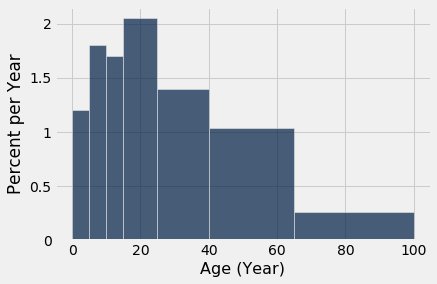

In [26]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

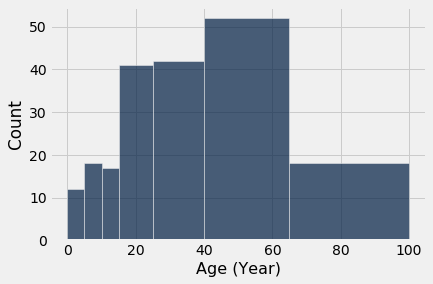

In [30]:
# DON'T DO THIS!!! TOTALLY MISLEADING!
top_movies.hist('Age', bins = my_bins, unit = 'Year', normed = False)

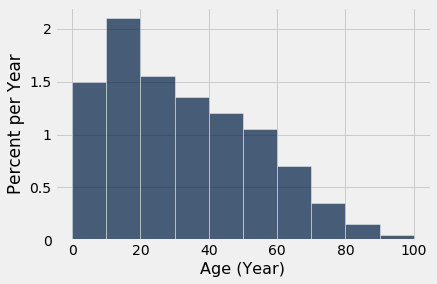

In [31]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

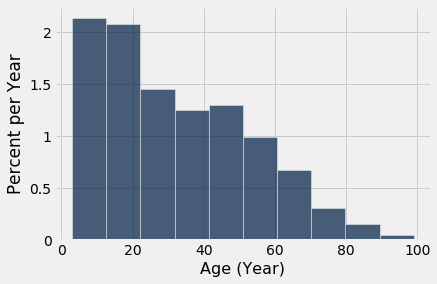

In [32]:
# Default is 10 bins of equal size
top_movies.hist('Age', unit='Year')

## Height ##

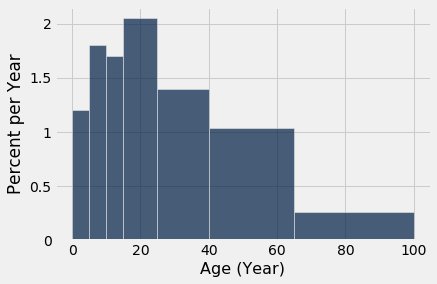

In [33]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [34]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,42,21
40,52,26
65,18,9
100,0,0


In [35]:
# 25.5% of movies are in the [40, 65) bin

percent = binned_data.where('bin', 40).column('Percent').item(0)

In [36]:
# The width of the 40-65 bin

width = 65 - 40

In [37]:
# Area of rectangle = height * width

height = percent / width
height

1.04

In [38]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,42,21
40,52,26
65,18,9
100,0,0


In [39]:
binned_data.num_rows

8

In [40]:
widths = np.diff(binned_data.column('bin'))
len(widths)

7

In [41]:
bin_lefts = np.arange(binned_data.num_rows - 1)
binned_data = binned_data.take(bin_lefts)

In [42]:
bin_heights = binned_data.column('Percent') / widths
binned_data = binned_data.with_column('Height', bin_heights)

In [43]:
binned_data

bin,Age count,Percent,Height
0,12,6,1.2
5,18,9,1.8
10,17,8.5,1.7
15,41,20.5,2.05
25,42,21,1.4
40,52,26,1.04
65,18,9,0.257143


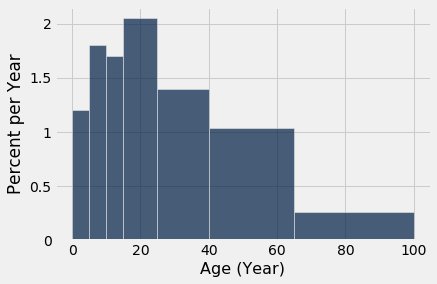

In [44]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')